## Sklearn Implementation

Let's load the data of our business case now

In [5]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 4.85MB/s]


In [7]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [12]:
churn.shape

(5700, 21)

In [10]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

We will choose 5 features for our logistic regression which we selected using simple EDA

You can go through the EDA of this to understand how we selected these features:

https://colab.research.google.com/drive/1nkbiGCMrevDzdSG9yN5bXaxeC8CPJSQg?usp=sharing

In [ ]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape
X = churn[cols]
X.shape

(5700, 5)

Let's split the data into training, validation and testing

In [14]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
print("train data shape: ",X_train.shape)
print("val data shape: ",X_val.shape)
print("test data shape: ",X_test.shape)


train data shape:  (3420, 5)
val data shape:  (1140, 5)
test data shape:  (1140, 5)


We will scale our data before fitting the model

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # fit on training data

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [19]:
model.intercept_

array([-0.01215015])

In [22]:
model.predict(X_train).shape

(3420,)

In [23]:
model.predict(X_test).shape

(1140,)

## Accuracy Metric

#### How do we measure the performance of our classification model?

- We can't use R2 score to begin with, since R2 score tells us our far/close we are to actual result, while here we want to check how many correct values we predicted.

#### What metric can we then use for classification?

Accuracy

#### What do we mean by accuracy?

Let's take an example to understand this.

Say we have 5 sample data points, out of which we predicted 3 correct, and two wrong

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/743/original/image_2023-06-14_050952707.png?1686699594" height=500 width=600>

The accuracy in this case would be defined as:

$\frac{Number \ of \ correct \ predictions}{Total \ number \ of \ points}$

So accuracy in this case would be 3/5 = 0.6

We can convert it to percentage, which would be 60%. So we can say, our model's accuracy is 60%

Let's implement our accuracy metric now

In [24]:
def accuracy(y_true, y_pred):
  y_true = y_true.reshape(len(y_true))
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [25]:
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [26]:
accuracy(y_val, model.predict(X_val))

0.6982456140350877

In [27]:
accuracy(y_test, model.predict(X_test))

0.7008771929824561

So our model has a validation accuracy of 0.71, or 71.49%

Let's see how we can perform hyperparameter tuning on our logistic regression model


##**Hyperparameter tuning**

We will tune the regularization rate of our model.

You can refer to the documentation for the various list of parameters in logistic regression.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

In [28]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

The code is similar to the code we did in hyperparameter tuning




In [29]:
len(val_scores)

50

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

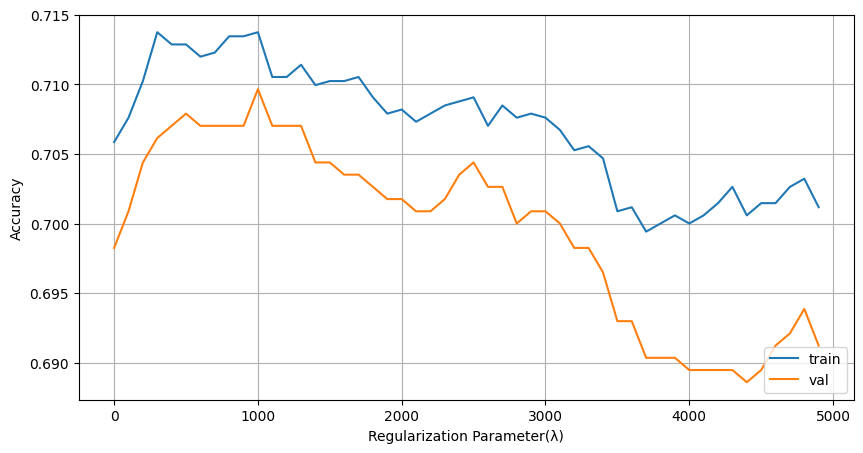

In [30]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


- We see how Validation increases to a peak and then decreases

- Notice as Regularization is increasing, the Accuracy decreasing since model is moving towards Underfit

Let's take lambda value as 1000 for this data and check the
results

In [31]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001)

In [32]:
accuracy(y_train, model.predict(X_train))

0.7137426900584796

In [33]:
accuracy(y_val, model.predict(X_val))

0.7096491228070175

We can observe an increase of 0.01, or 1%, in both training and validation data

Let's check our model for test data too

In [34]:
accuracy(y_test, model.predict(X_test))

0.7096491228070175

## Logit/ Log odds


### Log odds interpretation of logistic regression

#### What do you mean by odds?

You must have heard this term in betting maybe.

E.g.: The odds of the horse winning the race is 4:1

In simple terms, odds is the ratio of probability of scuess/probability of failure.

So for the above example, the Probability of winning will be: 4/4+1 = 4/5 = 0.8

Inverserly, probability of losing will be 1/5 = 20%


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/744/original/image_2023-06-14_051233014.png?1686699754" height=500 width=600>

So here, odds = p/1-p , where,

P: P(Y=1|x) -> odds of belonging to class 1

<img src= "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/745/original/image_2023-06-14_051345731.png?1686699827" height=500 width=600>

#### Which concept of earlier is this similar to?

Remember, $σ(p)$ also defined probability.

So if we simplify our winning/losing as belonging to class 1/0, then $σ(p)$ here defines the probability of belonging to class 1 (winning class)

So

$$p=σ(z)$$
$$=σ(w^Tx+w_0)$$
$$=\frac{1}{1+e^{-z}}=\frac{1}{1+\frac{1}{e^z}}=\frac{1}{\frac{e^z + 1}{e^z}}$$
$$=>p=\frac{e^z}{1+e^z}$$




<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/746/original/image_2023-06-14_051456811.png?1686699898" height=500 width=600>

Similarly, for 1-p

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/747/original/image_2023-06-14_051600771.png?1686699961">

$$1-p=1-\frac{e^z}{1+e^z}$$
$$=> 1-p = \frac{1}{1+e^z}$$


Now, we know odds = $\frac{p}{1-p}$

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/748/original/image_2023-06-14_051636254.png?1686699997">

$$\frac{p}{1-p}$$
$$=\frac{\frac{e^z}{1+e^z}}{\frac{1}{1+e^z}}$$
$$=> \frac{p}{1-p}=e^z$$

Taking logs on both sides:

$$log_e(odds)=log_e(e^z)$$
$$=>log(odds)=log(\frac{p}{1-p})=z$$

#### What does this mean geometrically?

z: distance of a point from the hyperplane line

So log(odds) is the distance of a point from the line

In other words, if distance of a point is more from the hyperplane, the odds of it being in class 1 is higher

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/749/original/image_2023-06-14_051717508.png?1686700038" height=550 width=600>

Remember,

- In linear regression, there is a **direct relation of "x" with "y"**
- But in logistic regression, there is a non-linearity which can be seen due to log, and no direct relation



<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/761/original/image_2023-06-14_064625943.png?1686705387" height=500 >

To find the probability of the point lying, we simply apply exponential to both sides and solve for p, which would give:

$p=\frac{1}{1+e^{-z}}$

Note: Sigmoid and Logit and just inverse of each other, and both can be used to build a logistic regression model

## Impact of outliers

### Case I: When the outlier lies on the correct side

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/751/original/image_2023-06-14_052018179.png?1686700219" height=500 width=600>

We know, the loss function L:

$$-[y\log\hat{y} + (1-y)log(1-\hat{y}]$$

Since the outlier point belongs to class 1, L becomes

$$-log \ \hat{y}$$

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/752/original/image_2023-06-14_052120066.png?1686700281" height=500 width=600>

Now, $\hat{y}=σ(z^i)$


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/753/original/image_2023-06-14_052158593.png?1686700322" height=500 width=600>

Say $z^i$ is significantly large

As we can see from the sigmoid plot,
- $σ(z^i)$ tends to 1 for values above 4
- So, $log \ \hat{y}$ will tend to 0

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/754/original/image_2023-06-14_052241823.png?1686700363" height=500 width=600>

Since the Loss is very less in this case:

=> The impact of outlier is **very less**

### Case II: When the outlier is on the opposite/wrong side

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/755/original/image_2023-06-14_052332693.png?1686700414" height=500 width=600>

In this case,

$$-[y\log\hat{y} + (1-y)log(1-\hat{y}]$$

Since the outlier point belongs to class 1, L becomes

$$-log \ \hat{y}$$

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/756/original/image_2023-06-14_052412469.png?1686700453" height=500 width=600>

Now, $\hat{y}=σ(z^i)$


Let's say $z^i=-4.3$

So $\hat{y}$ becomes 0.01

Therefore, L = $-log_e(0.01)$

This comes out almost equal to 4.6, which is a very large value

=> The impact of outlier will be **very high**

Thus the best thing is to find the outlier and remove them, so that we get accurate results

## Multi-class classification

Till now we have seen how to use logistic regression to classify between two classes

But in real world there will be cases with many more classes

#### How can we use logistic regression in cases with more than two output classes?

We will use something called "one vs rest" or "one vs all" (OVR)

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/758/original/image_2023-06-14_052559087.png?1686700560" height=500 width=600>

Let's suppose we have a data with 3 output classes:
- Orange
- Apple
- Grape

We will create three logistic regression models (three since output classes=3)
- First model will check whether the input is orange or not
- Second model will check whether the input is apple or not
- Third model will check whether the input is grape or not

To train these models, we can't use the same dataset, since our data will have three classes.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/759/original/image_2023-06-14_052629426.png?1686700590" height=800 width=600>

So we will modify our data for the three models.

Say for model 1, to check whether the input is orange or not,
- Our output column will be modified by replacing the values with orange as 1, and rest values with 0

We will do the same for the other two models

#### Now given an input point, how to predict which class it belongs to?

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/760/original/image_2023-06-14_052727429.png?1686700648" height=500 width=800>



We will pass the input through all the three models, and then take argmax of the output probabilities

Say for e.g., in our above case
- $y_{orange}$=0.92
- $y_{apple}$=0.13
- $y_{grape}$=0.01

So, the output class will be orange, since it has the highest $\hat{y}$ value

Let's see an implementation of the same using sklearn

### Sklearn Code implementation for MultiClass Classification

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

Creating some data with multiple classes

In [ ]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


Plotting the data

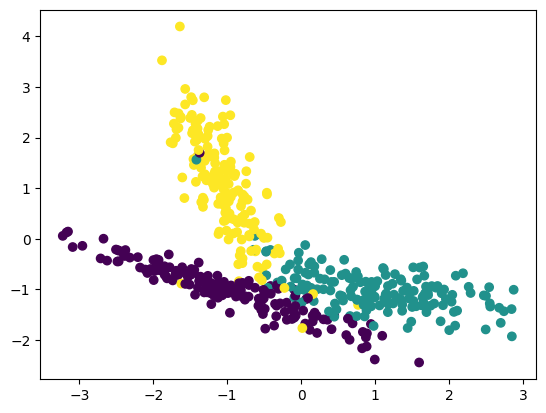

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


Splitting the data into train validation and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

training the OneVsRest Logistic Regression model

In [ ]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

Checking the Accuracy of Training, validation and Test dataset

In [ ]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


Creating Hyperplane of OVR LogisticRegression for the entire data

In [ ]:
X

array([[-1.06046348e+00, -9.46151693e-01],
       [-1.07328735e+00,  1.12579697e+00],
       [-1.30251507e+00,  1.27609317e+00],
       [-9.82024695e-01, -1.41943709e-02],
       [ 1.10608927e+00, -5.78336994e-01],
       [ 1.68740640e-01, -1.23179638e+00],
       [-1.10643431e+00, -9.73680424e-01],
       [ 4.23058277e-02, -1.01173227e+00],
       [-1.27793724e+00, -8.24138962e-01],
       [-9.65763076e-01, -9.58893538e-01],
       [-7.24877888e-01,  7.74568331e-01],
       [ 3.94484197e-01, -1.02280544e+00],
       [-1.42880776e+00,  2.27597716e+00],
       [-1.48473818e+00, -5.97862989e-01],
       [-5.06213921e-01, -1.17932620e+00],
       [ 3.16059359e-01, -8.01995782e-01],
       [-5.24452044e-01, -5.90589105e-01],
       [-1.07565483e+00,  1.19021951e+00],
       [ 1.66390609e+00, -7.30037480e-01],
       [ 6.58706788e-01, -1.52760674e+00],
       [ 9.19890507e-01, -1.18593296e+00],
       [-1.24549170e+00,  1.62332518e+00],
       [-1.00278261e+00,  1.35164489e+00],
       [ 1.

<ipython-input-28-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


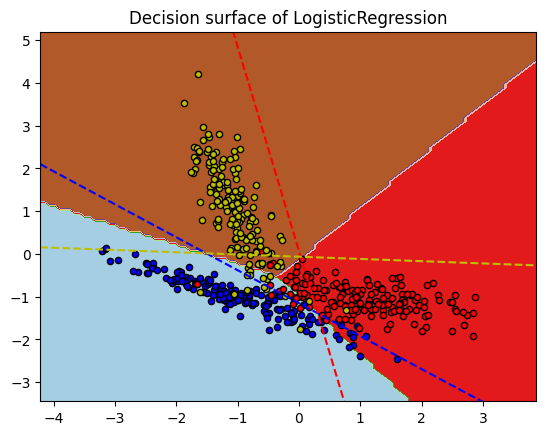

In [ ]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

**Observe**

We can see how One-vs-Rest Logistic Regression is able to classify Multi-class Classification data